<h1> Stéganographie par Methode 1</h1>
<i>par Claudia Delgado et Mehdi Miah - Mars 2017</i>

# Plan 

# Import

In [291]:
from scipy import misc
import numpy as np
from PIL import Image
import time
import matplotlib.pyplot as plt

%matplotlib inline

# Choices of images

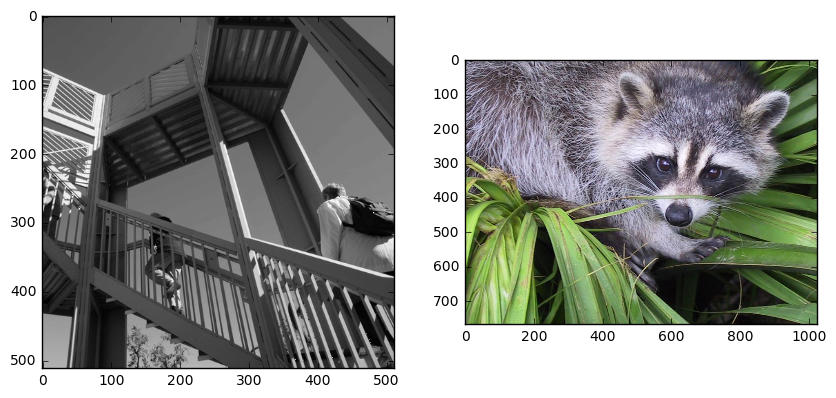

In [292]:
original_carrier = misc.ascent()
original_carrier2 = misc.face()

plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1)
plt.imshow(original_carrier, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(original_carrier2)

# Choice of secret message

In [293]:
def load_message(message):
    #check that the secret message is of type string
    assert type(message)==str, "Le message secret doit être un message texte"
    bin_message=''
    for i in message:
        bin_message+=(format(ord(i),'08b'))
    return(bin_message)

In [294]:
# Shapes of the image and the secret message
print('The carrier image can suporter', (original_carrier.shape[0]-1)*original_carrier.shape[1], 'characters.')
print('The hidden secret in binary representation is composed of ', len(bin_message),'characters.')

The carrier image can suporter 261632 characters.
The hidden secret in binary representation is composed of  1008 characters.


In [295]:
# Test if the the secret message can be hidden in the carrier image
if (original_carrier.shape[0]-1)*original_carrier.shape[1] >= len(bin_message):
    print('OK, the image can carry the secret message.')
else:
    print('BEWARE, you have to trunc the secret message.')
    
# Optimal size    
x = original_carrier.shape[0]
y = original_carrier.shape[1]
c = ((x-1)*y)/8 # First line is used to ....

print('The bigger dimension size is %.f x %.f which mean that your are allowed to use  %.f characters.' %(x , y,c))

OK, the image can carry the secret message.
The bigger dimension size is 512 x 512 which mean that your are allowed to use  32704 characters.


# Functions to code and decode

In [296]:
def code_steganography_meth1(carrier, hidden):
    '''
    Input : carrier - number between 0 and 255 corresponding to the bit code of the carrier image
          : hidden - number between 0 and 1 corresponding to 1/8 of a character
    Output : output - image resulting from the code      
    '''
    #check that the hidder number is an integer between 0 and 1 included
    assert hidden in range(0,2), "hidden should be equals to 0 or 1"

    if(carrier==255):
        carrier-=1
    if(carrier%2!=hidden%2):
        carrier+=1
    return carrier

In [321]:
def decode_steganography_meth1_length_mess(output):
    '''
    Input : output - number between 0 and 255 corresponding to the bit code of the output image
    '''
    #Decode the length oh the message
    output_str = str(output)
    hidden = output_str[len(output_str)-1:]
    return(hidden)

In [322]:
def decode_steganography_meth1(output):
    '''
    Input : output - number between 0 and 255 corresponding to the bit code of the output image
    '''
    #Decode the binary code
    hidden = str(output%2)

    return(hidden)

In [323]:
message = "Chers compatriotes, je me tiens aujourd'hui devant vous avec un sentiment d'humilité, devant la tâche qui nous attend, de reconnaissance pour la confiance que vous m'avez manifestée, gardant à l'esprit les sacrifices consentis par nos ancêtres. Je remercie le président Bush pour les services qu'il a rendus à notre nation, ainsi que pour la générosité et la coopération dont il a fait preuve tout au long de cette transition. Quarante-quatre Américains ont, avant moi, prêté serment pour la présidence. Leurs paroles ont été prononcées pendant des vagues de prospérité et alors que nous vivions dans les eaux calmes de la paix. Cependant, en d'autres temps, ce serment a été prêté alors que les nuages s'amoncelaient et que les tempêtes faisaient rage. Dans ces moments-là, l'Amérique a poursuivi son chemin. Pas seulement en raison de la compétence ou de la vision de ceux qui étaient au gouvernement, mais parce que nous, le peuple, nous sommes restés fidèles aux idéaux de nos pairs et respectueux de nos actes fondateurs."
def code_text_in_image_meth1(image, message):
    bin_message= load_message(message)
    length_message = len(bin_message)
    length_max_message = (image.shape[0]-1)*image.shape[1]
    assert length_max_message >= length_message , ('BEWARE, in this image you are allowed to use  %.f characters, you have to trunc the secret message.' %(length_max_message/8))
    output = image.copy()
    size_message_bin=format(len(str(length_message)) ,'08b')   # EXPLICATION
    
    # Code for the first line of the image  : hide the length of the secret message
    for j in range(0,8):
        output[0,j]=code_steganography_meth1(output[0,j], int(size_message_bin[j]))
    for i in range(1,len(str(length_message))+1):  
        output[0,i+8] = int(str(output[0,i+8])[:len(str(output[0,i+8]))-1]+str(length_message)[i-1])   
    
    # Code from the second line of the image to the end : hide the secret message
    k=0
    for i in range(1,image.shape[0]+1):
        for j in range(image.shape[1]):
            if(k<length_message):
                output[i,j] = code_steganography_meth1(image[i,j], int(bin_message[k]))
            else:
                break
            k=k+1

    plt.imshow(output, cmap=plt.cm.gray)
    plt.title('Encoded image with secret message' )
    plt.show()
    return(output)

In [411]:
def decode_text_into_image_meth1(image):
    output = image.copy()
    size_message_bin=''
    
    # Code for the first line of the image  : get the length of the secret message
    for j in range(0,8):
        size_message_bin += decode_steganography_meth1(output[0,j])
    size_message_bin = int(size_message_bin, 2)
    nb_characters_message = ''
    for i in range(1,len(str(length_message))+1):  
        nb_characters_message += decode_steganography_meth1_length_mess(output[0,i+8])
    nb_characters_message = int(nb_characters_message)
   
    # Code from the second line of the image to the end : get the secret message
    hidden_bin_message = ''
    k = 0
    for i in range(1,image.shape[0]+1):
        for j in range(image.shape[1]):
            if(k<nb_characters_message):
                 hidden_bin_message += decode_steganography_meth1(output[i,j])
            else:
                break
            k=k+1
    hidden_message = ''
    print(int(nb_characters_message/8))
    for l in range(int(nb_characters_message/8)):
          hidden_message +=  chr(int(hidden_bin_message[l*8:(l+1)*8],2)) 
        
    return(image,hidden_message)

# Application

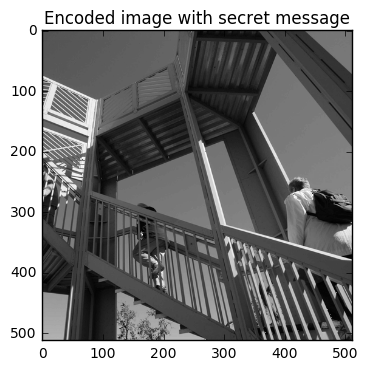

Wall time: 248 ms


In [412]:
%%time
#Encode
output=text_to_image_meth1(image, message)

In [413]:
output

array([[ 84,  84,  84, ..., 117, 117, 117],
       [ 82,  83,  84, ..., 118, 118, 118],
       [ 80,  81,  83, ..., 117, 117, 118],
       ..., 
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [418]:
len(message)

1026

In [417]:
#Decode
decode_text_into_image_meth1(output)


1026


(array([[ 84,  84,  84, ..., 117, 117, 117],
        [ 82,  83,  84, ..., 118, 118, 118],
        [ 80,  81,  83, ..., 117, 117, 118],
        ..., 
        [178, 178, 178, ...,  57,  59,  57],
        [178, 178, 178, ...,  56,  57,  57],
        [178, 178, 178, ...,  57,  57,  58]]),
 "Chers compatriotes, je me tiens aujourd'hui devant vous avec un sentiment d'humilité, devant la tâche qui nous attend, de reconnaissance pour la confiance que vous m'avez manifestée, gardant à l'esprit les sacrifices consentis par nos ancêtres. Je remercie le président Bush pour les services qu'il a rendus à notre nation, ainsi que pour la générosité et la coopération dont il a fait preuve tout au long de cette transition. Quarante-quatre Américains ont, avant moi, prêté serment pour la présidence. Leurs paroles ont été prononcées pendant des vagues de prospérité et alors que nous vivions dans les eaux calmes de la paix. Cependant, en d'autres temps, ce serment a été prêté alors que les nuages s'amoncel